<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistic-related-Python/blob/main/Data_Camp_Case_Studies_Zebrafish_ECDF%2C_PDF%2C_CI%2C_Hyp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zebrafish active bout lengths

## Importing

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
link = 'https://assets.datacamp.com/production/repositories/1067/datasets/8885c23f1c156149b736ca2ea0d9b01bbc727ecd/gandhi_et_al_bouts.csv'

fish_df = pd.read_csv(link, skiprows=4).copy()
print(fish_df.shape)
fish_df.head()

(5475, 3)


,genotype,bout_length,fish
0,het,12.00,1
1,het,33.00,1
2,het,0.96,1
3,het,4.98,1
4,het,1.98,1


## EDA 

An active bout is a stretch of time where a fish is constantly moving.

Plot an ECDF of active bout length for the mutant and wild type fish for the seventh night of their lives.

In [ ]:
print(fish_df.genotype.unique())

het_fish = fish_df[fish_df.genotype == 'het']['bout_length'].values
wt_fish = fish_df[fish_df.genotype == 'wt']['bout_length'].values
mut_fish = fish_df[fish_df.genotype == 'mut']['bout_length'].values

['het' 'wt' 'mut']


There are three types of fish studied in the dataset:

- Wild Type: No mutations.

- Heterozygote: Mutation on one of two chromosomes.

- Mutant: Mutation on both chromosomes.

In [ ]:
pip install dc_stat_think

### ECDF

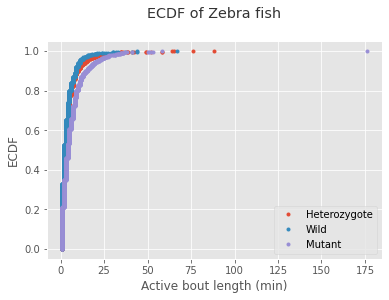

In [ ]:
# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

# Generate x and y values for plotting ECDFs
x_het, y_het = dcst.ecdf(het_fish)
x_wt, y_wt = dcst.ecdf(wt_fish)
x_mut, y_mut = dcst.ecdf(mut_fish)

# Plot the ECDFs
plt.plot(x_het, y_het, marker='.', linestyle='none')
plt.plot(x_wt, y_wt, marker='.', linestyle='none')
plt.plot(x_mut, y_mut, marker='.', linestyle='none')
plt.legend(('Heterozygote', 'Wild', 'Mutant'))
plt.title('ECDF of Zebra fish', y=1.08, alpha=0.8)
plt.xlabel('Active bout length (min)')
plt.ylabel('ECDF')
plt.show()

### PDF

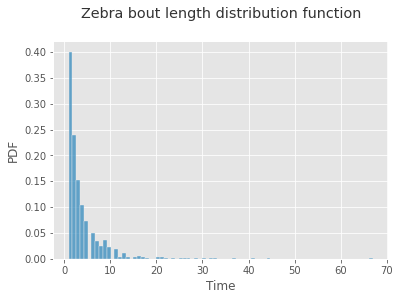

In [ ]:
# Make a histogram 
ax = sns.histplot(x_wt, stat='density', kde=False, bins=80)
plt.title('Zebra bout length distribution function', y=1.08, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('PDF')
plt.show()

The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson process; the fish have no apparent memory about when they became active.

The exponential distribution has a single parameter that describes the characteristic time between arrivals of a Poisson process.

## Computing mean of active bout length

In [ ]:
mean_het = het_fish.mean()
print('Het fish mean active bout length', mean_het)
mean_wt = wt_fish.mean()
print('Wild fish mean active bout length', mean_wt)
mean_mut = mut_fish.mean()
print('Mutant fish mean active bout length', mean_mut)

Het fish mean active bout length 4.433677229182006
Wild fish mean active bout length 3.873555713271929
Mutant fish mean active bout length 6.543372781065037


This is only the sample mean. Let's estimate mean parameter through confidence interval:

## Parameter estimation: CI active bout length

In [ ]:
# Draw bootstrap replicates
bs_reps_het = dcst.draw_bs_reps(het_fish, np.mean, size=10000)
bs_reps_wt = dcst.draw_bs_reps(wt_fish, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(mut_fish, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_het = np.percentile(bs_reps_het, [2.5, 97.5])
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
het: mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
wt:  mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
mut: mean = {6:.3f} min., conf. int. = [{7:.1f}, {8:.1f}] min.
""".format(mean_het, *conf_int_het, mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


het: mean = 4.434 min., conf. int. = [4.2, 4.7] min.
wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



### Plot of CI

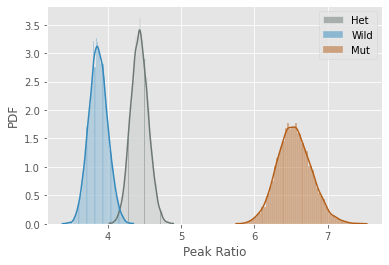

In [ ]:
# Make a histogram of the Confidence interval of the mean.
sns.histplot(bs_reps_het, stat='density', kde=True, label='Het', color='#6d7874')
sns.histplot(bs_reps_wt, stat='density', kde=True, label='Wild')
sns.histplot(bs_reps_mut, stat='density', kde=True, color='#b45f19', label='Mut')
plt.xlabel('Peak Ratio')
plt.ylabel('PDF')
plt.legend()
plt.show()

The confidence intervals seems separated one another. 

Nonetheless, we will proceed to perform hypothesis tests for Het and Wild whose PDF touches in the tails.

We will test if the mean active bout length actually changed with Het mutation.


## Permutation hypothesis tests



Pipeline for hypothesis testing:

- Clearly state the null hypothesis

- Define your test statistic: In this case the mean.

- Generate many sets of simulated data assuming the null hypothesis is true.


Null hypothesis: Both Het and Wild active bout lengths are identically distributed.

test statistic: Difference in mean active bout length betwen heterozygotes and wild type.

p-value: The probability of obtaining a value of your test statistic that is at least as extreme as what was observer, under the assumption the null hypothesis is true. In this case test statistic greater than or equal to what was observed.

We use permutation test:

In [ ]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(mean_het) - np.mean(mean_wt)
print('Observed mean difference:', diff_means_exp)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(het_fish, wt_fish, 
                               dcst.diff_of_means, size=10000)


Observed mean difference: 0.560121515910077


In [ ]:
# Compute the p-value: p_val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0014


A p-value of 0.001 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.

## Bootstrap hypothesis test

The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are identically distributed. Now, use a bootstrap hypothesis test to test the hypothesis that the means are equal, making no assumptions about the distributions.

In [ ]:
# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((wt_fish, het_fish))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = wt_fish - np.mean(wt_fish) + mean_bout_length
het_shifted = het_fish - np.mean(het_fish) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted, np.mean, size=10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_reps
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.0008
